## Steps for a machine learning model

### There are following steps:

0.An end-to-end Scikit-Learn worfklow

1.Getting the data ready

2.Choosing the right maching learning estimator/aglorithm/model for your problem

3.Fitting your chosen machine learning model to data and using it to make a prediction

4.Evaluting a machine learning model

5.Improving predictions through experimentation (hyperparameter tuning)

6.Saving and loading a pretrained model

7.Putting it all together in a pipeline

# 1. Getting our data ready to be used with machin learning

Three main things we have to do:

    1. Split data into features and labels (usually 'X' & 'y')
    
    2. Filling (also called imputing or disregard missing values
    
    3. Convetring non-numerical values to numerical values (also called feature encoding)

In [1]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Data set
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Split data into features and labels
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure all the data in data set is numeric
For this we need another data set 

In [7]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [8]:
# Split data into features and labels
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

# It will give the error because the columns like Make, Colour are in string formate
# We have to convert these categorical columns into numeric column

ValueError: could not convert string to float: 'Toyota'

In [10]:
# Turn the categorical Columns into Numberic 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_column = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_column)],remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [11]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [12]:
# Lets Re-fit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [13]:
model.score(x_test,y_test)

0.3235867221569877

In [14]:
import sklearn
print(sklearn.__version__)

1.0.2


In [15]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### 1.2 What if there were missing values?

1. Fill them with some values (also known as Imputation).
2. Remove the sample with missing data.

### Option 1: Fill Missing values with Pandas

In [16]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [17]:
# Find the no. of missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
# Let's fill the missing column

car_sales_missing["Make"].fillna("Missing",inplace=True)
car_sales_missing["Colour"].fillna("Missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean,inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [19]:
# Now check the data set
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
# Remove rows with missing values
car_sales_missing.dropna(inplace=True)

In [21]:
# Lets try and covert string column into numeric column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_column = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" , one_hot, categorical_column)] , remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Fill Missing values with Scikit-Learn

In [22]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [23]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
# Drop the rows with no lable
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [25]:
# Let's Create x and y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

# Now we will split the data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
X_train.isna().sum()

Make             39
Colour           39
Odometer (KM)    30
Doors            38
dtype: int64

In [27]:
# Fill the missing Values with Scikit-Learn
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value = 'missing')
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_column = ["Make","Colour"]
door_column = ["Doors"] 
num_column = ["Odometer (KM)"]

# Create an imputer (somethin that fills missing data)
imputer = ColumnTransformer([("cat",cat_imputer,cat_column),
                             ("door",door_imputer,door_column),
                             ("num",num_imputer,num_column)
                            ])

# Fill train and test values seprately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

#check filled X_train
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [28]:
# Get our data back into into DataFrames
car_sales_filled_test = pd.DataFrame(filled_X_test, columns=["Make","Colour","Door","Odometer (KM)"])
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=["Make","Colour","Door","Odometer (KM)"])

In [29]:
# Check missing values in test data
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Door             0
Odometer (KM)    0
dtype: int64

In [30]:
# Check missing values in training data
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Door             0
Odometer (KM)    0
dtype: int64

In [31]:
# Check our original DataFrame
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [32]:
# Lets try and covert string column into numeric column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_column = ["Make","Colour","Door"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_column)], remainder="passthrough")

# Fill training and test values seprately
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

#check transformed and filled X_train
transformed_x_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

In [33]:
# Now we fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure ot use transformed (filled and one hot encoded x data)
model.fit(transformed_x_train,y_train)
model.score(transformed_x_test,y_test)

0.09497633411335504

# 2. Choosing the right estimator/algorithm for your problem
Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:

1. Sklearn refers to machine learning models and algorithms as estimators.

2. Classification problem - predicting a category (heart disease or not).
    2.1 Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
    
3. Regression problem - predicting a number (selling price of a car).

4. Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

You can see it's split into four main categories. Regression, classification, clustering and dimensionality reduction. Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem (trying to predict a number). We'll use the California Housing dataset built into Scikit-Learn's datasets module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.

## 2.1 Picking a machine learning model for a regression problem

In [34]:
# Getting California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [35]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df['target'] = housing['target']
housing_df  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [36]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge
model = Ridge()

# Setup Random seed 
np.random.seed(42)

# create x and y
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Imputation and fit the model(on the traning set)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440127

In [37]:
# Import algorithm/estimator
from sklearn.svm import SVR
model = SVR()

# Setup Random seed 
np.random.seed(42)

# create x and y
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Imputation and fit the model(on the traning set)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.016485360107173053

In [38]:
# Import algorithm/estimator
from sklearn.linear_model import LassoLars
model = LassoLars(alpha=.1, normalize=False)

# Setup Random seed 
np.random.seed(42)

# create x and y
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Imputation and fit the model(on the traning set)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5318931831658322

### What if we didn't get the result we are looking for 
We can try diffrent model.

How about we try an ensemble model.

Sklearn's ensemble model can be found here : https://scikit-learn.org/stable/modules/ensemble.html

In [39]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Setup Random seed
np.random.seed(42)

# Create x and y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fitting the model
model.fit(X_train, y_train)

# Checking the score in test set
model.score(X_test,y_test)

0.8065734772187598

In [40]:
model.predict(X_test)

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

## 2.2 Picking a machine learning model for a classification problem

In [41]:
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [42]:
# Create DataFrame from the above data set
wine_df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
wine_df["target"] = wine["target"]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [43]:
# Checking for NaN values (This set do not have a missing values so we can directly start building a model)
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [44]:
wine_df["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [45]:
# Import Liner_SVC/model
from sklearn.svm import LinearSVC
clf = LinearSVC()

# Setup Random seed
np.random.seed(42)

# create x and y
x = wine_df.drop("target", axis=1)
y = wine_df["target"]

# split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

# Fit the model into Training set
clf.fit(X_train, y_train)

# Check the score on test set
clf.score(X_test, y_test)


C:\Users\krman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9166666666666666

In [46]:
# Import RandomForestClassifier/model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Setup Random seed
np.random.seed(42)

# create x and y
x = wine_df.drop("target", axis=1)
y = wine_df["target"]

# split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

# Fit the model into Training set
clf.fit(X_train, y_train)

# Check the score on test set
clf.score(X_test, y_test)


1.0

Tidbit:
1. If you have structured data(Table), used ensemble methods
2. If you have unstructured data(Photo, Audio), use deep learing or transfer learning

# 3. Fitting your chosen machine learning model to data and using it to make a prediction

### 3.1 Fitting the model to the data

Diffrent names for:
* `x` = features,, features variables, data
* `y` = labels, targets, target variables

In [47]:
# Import RandomForestClassifier/model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Setup Random seed
np.random.seed(42)

# create x and y
x = wine_df.drop("target", axis=1)
y = wine_df["target"]

# split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

# Fit the model into Training set (training the machine learning model)
clf.fit(X_train, y_train)

# Check the score on test set (Use the patterns model has learned)
clf.score(X_test, y_test)


1.0

### 3.2 Making predictions using a machine learning model

There are two ways for predict:
* 1. `predict()` 
* 2. `predict_proba()`

In [48]:
clf.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [49]:
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

1.0

In [50]:
# Another way of doing this is with Scikit-Learn's score() function.
clf.score(X_test,y_test)

1.0

In [51]:
# Another way of doing this is with Scikit-Learn's accuracy_score() function.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

1.0

Make prediction with `predict_proba()`

In [52]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.97, 0.02, 0.01],
       [0.9 , 0.05, 0.05],
       [0.03, 0.26, 0.71],
       [0.91, 0.08, 0.01],
       [0.02, 0.92, 0.06]])

In [53]:
clf.predict(X_test[:5])

array([0, 0, 2, 0, 1])

In [54]:
X_test[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0


`predict()` can also be used for regression models

In [55]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [57]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [58]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [59]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

0.32659871732073664

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-i-`score()` method
2. The `scoring` parameter
3. problem-specific metric functions

More to read here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating a model with the `score()` method

In [60]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Set Random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit classfier to trainig data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score()` on our Regression problem...

In [63]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df['target'] = housing['target']
housing_df  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [64]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Set Random seed 
np.random.seed(42)

# Create x and y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model into training set
model.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
model.score(X_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model using the `scoring` parameter 

In [66]:
# Import Cross_validation 
from sklearn.model_selection import cross_val_score

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Set random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Fit the model into training set
clf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
clf.score(X_test, y_test)

0.8524590163934426

In [68]:
# Model is trained on 5 diffrent version of trainig data and evaluate on 5 diffrent test sets
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [69]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [70]:
# Scoring parameter set to none by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1. Acuracy**

In [71]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf.fit(X_train, y_train)

cross_val_score = cross_val_score(clf, x, y)

In [73]:
np.mean(cross_val_score)

0.811639344262295

In [74]:
print(f'Heart Disease Classifier Cross-Validation Accuracy is {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validation Accuracy is 81.16%


**2. Area under receiver operating charateristics curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf.fit(X_train, y_train)

# Import ROC from metrics
from sklearn.metrics import roc_curve

# Make a prediction with probability
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [76]:
y_positive = y_probs[:,1]
y_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [77]:
# Calculate fpr, tpr, and threshold
fpr, tpr, threshold = roc_curve(y_test, y_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [78]:
# Check the true positive rate
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [79]:
# Check the threshold
threshold

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

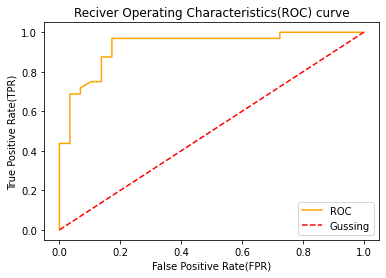

In [80]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true postive rate(tpr) of a model.
    """
    # Plot the ROC curve  
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot the line no predictive power (baseline)
    plt.plot([0,1], [0,1], color='r', linestyle='--', label = "Gussing")
    
    # Cutomize the plot
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("Reciver Operating Characteristics(ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

**3.Confusion Matrix**

A Confusion matrix is a quick way to compare the labels a model predict and the actual labels its was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [81]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [82]:
len(y_test), len(y_preds)

(61, 61)

In [83]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Lables"],
            colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Lables,,
0,24,5
1,4,28


### Creating Confusion matrix with Seaborn's heatmap()

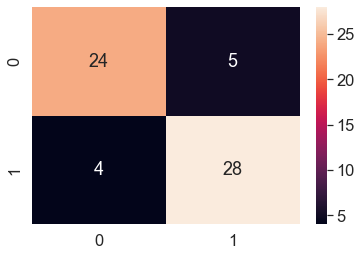

In [84]:
# OLD METHOD
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
con_matrix = confusion_matrix(y_test, y_preds)

# Create heatmap
sns.heatmap(con_matrix, annot=True, fmt="d" );

### Creating Confusion matrix using sikit-Learn

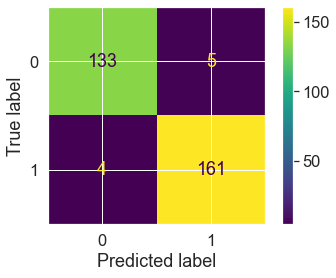

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

# from_estimator make confusion matrix from full data (it will predict the data for us)
ConfusionMatrixDisplay.from_estimator(clf, x, y);

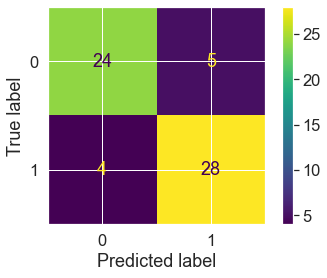

In [86]:
# from_predictions make confusion matrix from already predicted data(y_preds was predicted above)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

**4. Classification Report**
* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [88]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**To summarize:**

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

We'll check out the following.

* **1. R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* **2. Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
* **3. Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [89]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [90]:
y_test.mean()

2.0550030959302275

**1. r2_score**

In [91]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [92]:
r2_score( y_test, 
         y_test_mean)

0.0

In [93]:
r2_score(y_test,y_test)

1.0

In [94]:
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [95]:
# Calculate r2_score of housing_df
r2_score( y_test, 
         y_preds)

0.8065734772187598

**2. Mean Absolute Error (MAE)**

In [96]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [97]:
# Create a DataFrame
df = pd.DataFrame(data={"Actual Values" : y_test,
                        "Predicted Values" : y_preds                        
})
df["Diffrence"] = df["Predicted Values"] - df["Actual Values"]
df.head(10)

,Actual Values,Predicted Values,Diffrence
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [98]:
# MAE using Formula and diffrence
np.abs(df["Diffrence"]).mean()

0.32659871732073803

**3. Mean Squared Error (MSE)**

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

0.2534678520824551

In [100]:
df = pd.DataFrame(data={"Actual Values" : y_test,
                        "Predicted Values" : y_preds                        
})
df["Diffrence"] = (df["Predicted Values"] - df["Actual Values"])**2
df.head(10)

,Actual Values,Predicted Values,Diffrence
20046,0.47700,0.493840,0.000284
3024,0.45800,0.754940,0.088173
15663,5.00001,4.928596,0.005100
20484,2.18600,2.543160,0.127563
9814,2.78000,2.331760,0.200919
13311,1.58700,1.652530,0.004294
7113,1.98200,2.343230,0.130487
7668,1.57500,1.661820,0.007538
18246,3.40000,2.474890,0.855829
5723,4.46600,4.834478,0.135776


**Finally using `scoring` parameter**

**Let's see `scoring` parameter for Classification problem**

In [101]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf = RandomForestClassifier()

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [103]:
# Cross validation
np.random.seed(42)
cross_validation = cross_val_score(clf,x,y, scoring=None)
cross_validation

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [104]:
#Precision
np.random.seed(42)
cross_val_preci = cross_val_score(clf,x,y, scoring="precision")
cross_val_preci

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [105]:
print(f'The cross-validated precision is : {np.mean(cross_val_preci)}')

The cross-validated precision is : 0.8329547346025924


In [106]:
# Recall
np.random.seed(42)
cross_val_recall = cross_val_score(clf,x,y, scoring="recall")
cross_val_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [107]:
print(f'The cross-validated recall is : {np.mean(cross_val_recall)}')

The cross-validated recall is : 0.8545454545454545


**Let's see `scoring` parameter for regrssion problem**

In [108]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [110]:
# Cross-Validation
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y, cv=3, scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [111]:
np.mean(cv_r2)

0.6545458023124507

In [112]:
# Mean absolute error
cv_mae = cross_val_score(model,x,y, scoring="neg_mean_absolute_error")
cv_mae # More closer to 0 the better the model

array([-0.54469613, -0.40814006, -0.43817161, -0.46276059, -0.47331582])

In [113]:
# Mean squared error
cv_mse = cross_val_score(model,x,y, scoring="neg_mean_squared_error")
cv_mse # More closer to 0 the better the model

array([-0.52550379, -0.34795491, -0.3713332 , -0.4431212 , -0.46318762])

## 4.3 Using diffrent evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate sciki-learn machin learning models/estimators is to using the `sklearn.metrics`module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [114]:
# For Classfication problem 

# Import 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Set random seed
np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Fit the model
clf.fit(X_train, y_train)

# Create the y_preds for prediction
y_preds = clf.predict(X_test)

# Evaluate model using metric functions
print("Classifier metrics on the test")
print(f'Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision Score: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall Score: {recall_score(y_test,y_preds)*100:.2f}%')
print(f'f1 Score : {f1_score(y_test,y_preds)*100:.2f}')

Classifier metrics on the test
Accuracy Score : 85.25%
Precision Score: 84.85%
Recall Score: 87.50%
f1 Score : 86.15


In [115]:
# For Regression Problem

# Import
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Set Random Seed
np.random.seed(42)

# Create x and y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model
model.fit(X_train, y_train)

# Create Y_preds for prediction
y_preds = model.predict(X_test)

# Evaluate model using metric functions
print("Regrssor metrics on the test")
print(f'r2 Score : {r2_score(y_test, y_preds)*100:.2f}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_preds)*100:.2f}')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_preds)*100:.2f}')
print(f'Max Error : {max_error(y_test, y_preds)*100:.2f}')

Regrssor metrics on the test
r2 Score : 80.66
Mean Absolute Error : 32.66
Mean Squared Error : 25.35
Max Error : 313.76


# 5. Improving a model predictions
First Prediction - baseline predictions
First Model - baseline model

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

**From a data perspective asks:**
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

**From a model perspective asks:**
* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

**Hyperparameter vs Parameter**
* *Parameter* = model finds these patterns in data
* *Hyperparameters* = settings on a model you can adjust to (potentially) improve its ability to find patterns

**Three Ways to adjust hyperparameters:**

1. By hand
2. Randomly with RandomSearchCV
3. Randomly with GridSearchCV

In [116]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [117]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparison on y_true lables vs y_pred lables on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"Accuracy" : round(accuracy,2),
                   "precision" : round(precision,2),
                   "Recall" : round(recall,2),
                   "F1" : round(f1,2)}
    print(f'Accracy Score : {accuracy * 100:.2f}%')
    print(f'Precision : {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'f1 : {f1:.2f}')
    
    return metric_dict

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

np.random.seed(42)

# Shuffle the data 
heart_disease_shuffle = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split data into train, validation, and test sets
train_split = round(0.7 * len(heart_disease_shuffle)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffle)) # 15% data
X_train, y_train = x[:train_split], y[:train_split]
X_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = x[valid_split:], y[valid_split:]

# fit the model
clf.fit(X_train, y_train)

# Make prediction
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accracy Score : 82.22%
Precision : 0.81
Recall: 0.88
f1 : 0.85


In [119]:
np.random.seed(42)

# Create a second classifier with diffrent hyperparameter
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)

# Make prediction
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the classifier on the validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2);

Accracy Score : 80.00%
Precision : 0.81
Recall: 0.84
f1 : 0.82


## 5.2 Hyperparameter tunning with RandomizedSearchCV

In [120]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500,1000,1200],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2, 4, 6],
        "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

# Split x and y
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # Number of model to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [121]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [122]:
# Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accracy Score : 81.97%
Precision : 0.77
Recall: 0.86
f1 : 0.81


## 5.2 Hyperparameter tunning with GridSearchCV

In [123]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [124]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

# Set Random seed
np.random.seed(42)

# Create x and y
x = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

# Split data into training an test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid_2,
                      cv = 5,
                      verbose=2)

# Fit the model
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [126]:
# best Params
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [127]:
# Make prediction with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accracy Score : 78.69%
Precision : 0.74
Recall: 0.82
f1 : 0.78


Let's Compare our diffrent models metrics

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "clf_2" : clf_2_metrics,
                                "Random Search" : rs_metrics,
                                "Grid Serach" : gs_metrics})
compare_metrics

,baseline,clf_2,Random Search,Grid Serach
Accuracy,0.82,0.80,0.82,0.79
precision,0.81,0.81,0.77,0.74
Recall,0.88,0.84,0.86,0.82
F1,0.85,0.82,0.81,0.78


<AxesSubplot:>

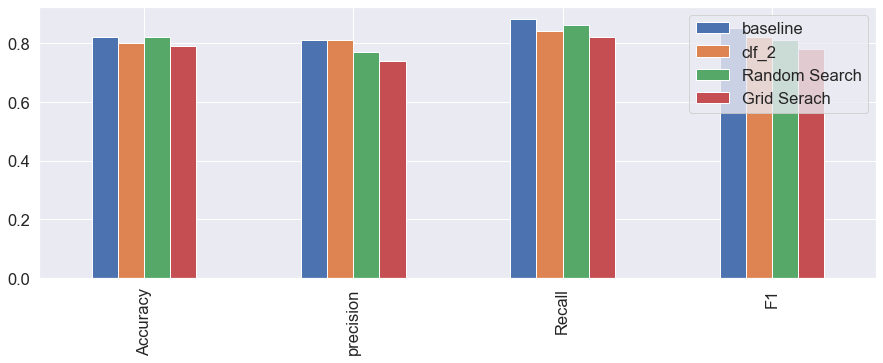

In [130]:
compare_metrics.plot.bar(figsize = (15,5))

# Metric Comparision Improvement (Very Important)


In [131]:
# Split into X & y
x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [132]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Baseline Model

In [133]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


# RandomizedSearchCV

In [134]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [135]:
# Find best parameters of RandomSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [136]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


# GridSearchCV

In [137]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [138]:
# Find best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [139]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


### Compare metrics
Compare all of the found metrics between the models.

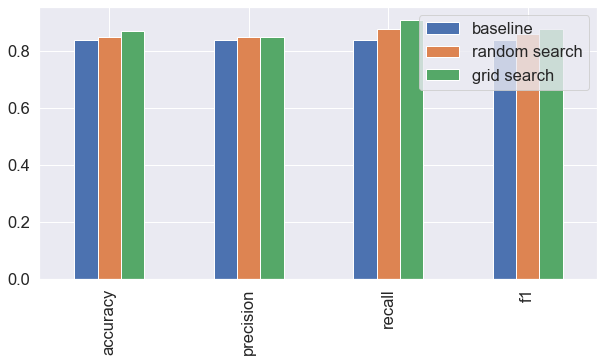

In [140]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 5));

# 6. Saving and loading trained machine learing models
Two ways to save and load machine learning model: 

   1. Wth Python's `pickle` module
    
   2. With the `joblib` module

**Pickle**

In [141]:
import pickle

# Save an existing model to title
pickle.dump(gs_clf, open("gs_random_forest_model.pkl","wb"))

In [142]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl", "rb"))

In [143]:
# Make some prediction 
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

**Joblib**

In [144]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename = "gs_random_forest_model_2.joblib")

['gs_random_forest_model_2.joblib']

In [145]:
# Import a saved joblib model
loaded_joblib_model = load(filename = "gs_random_forest_model_2.joblib")

In [146]:
# Make and evaluate joblibs predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

# 7.Putting it all together in a Pipeline

In [147]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [148]:
data.dropna(subset=["Price"], inplace=True)

In [149]:
data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

**Steps we want to do (all in one cell):**
1. Fill missing data
2. Convert data to numbers
3. Nuild a model on the data

In [150]:
# Getting data ready
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setting Random seed 
np.random.seed(42)

# Define different feartures and tranformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transform = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value="Missing")),
                                        ("OneHot", OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transform = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant", fill_value=4))])

num_features = ["Odometer (KM)"]
num_transform = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

# Setup preprocessing steps(fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers = [("cat", categorical_transform, categorical_features),
                                               ("door", door_transform, door_features),
                                               ("num", num_transform, num_features)])

# createing a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", RandomForestRegressor())])

# split the data
x = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and Score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22027638379177727

In [151]:
from sklearn.model_selection import cross_val_score

# Cross-validate our pipeline model
cross_val_score(model, x, y).mean()

0.2214783139161606

It's possible to use `GrideSearchCV` or `RandomizedSearchCV` with our `PipeLine`.

In [152]:
# use GrideSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" : ["mean", "median"],
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__min_samples_split" : [2,],
    "model__max_features" : ["auto"]
    
}

gs_model = GridSearchCV(model, 
                        pipe_grid, 
                        cv=5,
                        verbose=2)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sample

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('OneHot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [153]:
gs_model.score(X_test, y_test)

0.3259147147717266